   sizes  bedrooms   price
0   2104         3  399900
1   1600         3  329900
2   2400         3  369000
3   1416         2  232000
4   3000         4  539900 

      sizes  bedrooms     price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389 

0.13070336960771892 



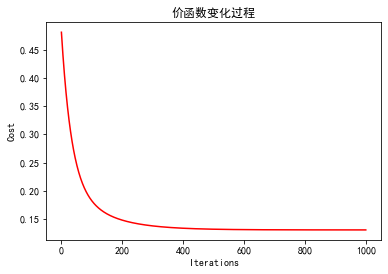

最优参数值theta： [[-1.01911616e-16  8.78503652e-01 -4.69166570e-02]] 



In [39]:
from numpy import *
import numpy as np
import pandas as pd4
import matplotlib.pyplot as plt

path=r'D:\jupyter\人工神经网络\data\ex1data2.txt'
df=pd.read_csv(path,names=['sizes','bedrooms','price'],encoding='utf-8')
print(df.head(),"\n")

#特征缩放
df['sizes']=(df['sizes']-df['sizes'].mean())/df['sizes'].std()
df['bedrooms']=(df['bedrooms']-df['bedrooms'].mean())/df['bedrooms'].std()
df['price']=(df['price']-df['price'].mean())/df['price'].std()
print(df.head(),"\n")

theta=np.matrix(np.zeros(3))
df.insert(0,'ones',1)#插入一列，作为x0，值为1
cols=df.shape[1]
X=np.matrix(df.iloc[:,:cols-1])
Y=np.matrix(df.iloc[:,cols-1:cols])

def costFunction(X,Y,theta):
    m=X.shape[0]
    return np.sum(np.power(X*theta.T-Y,2))/(2*m)

def gradientDescent(X,Y,theta,alpha,epoch):
    m=X.shape[0]
    cost=[]
    for i in range(epoch):
        theta=theta-alpha/m*(X*theta.T-Y).T*X
        cost.append(costFunction(X,Y,theta))
    return theta,cost

alpha=0.01
epoch=1000
final_theta,cost=gradientDescent(X,Y,theta,alpha,epoch)
final_cost=costFunction(X,Y,final_theta)
print(final_cost,"\n")

#画图查看过程
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig,ax = plt.subplots()
ax.plot(np.arange(epoch),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title("价函数变化过程")
plt.show()

print("最优参数值theta：",final_theta,"\n")
